In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('Housing.csv')
df.columns #list our features

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Preview the data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# DATA CLEANING






In [ ]:
 #view the number of rows and columns in the data
print( df.shape)

(545, 13)


In [ ]:
df.describe() #view summary statistics

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [ ]:
# View column data types
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


#  Exploratory Data Analysis (EDA)

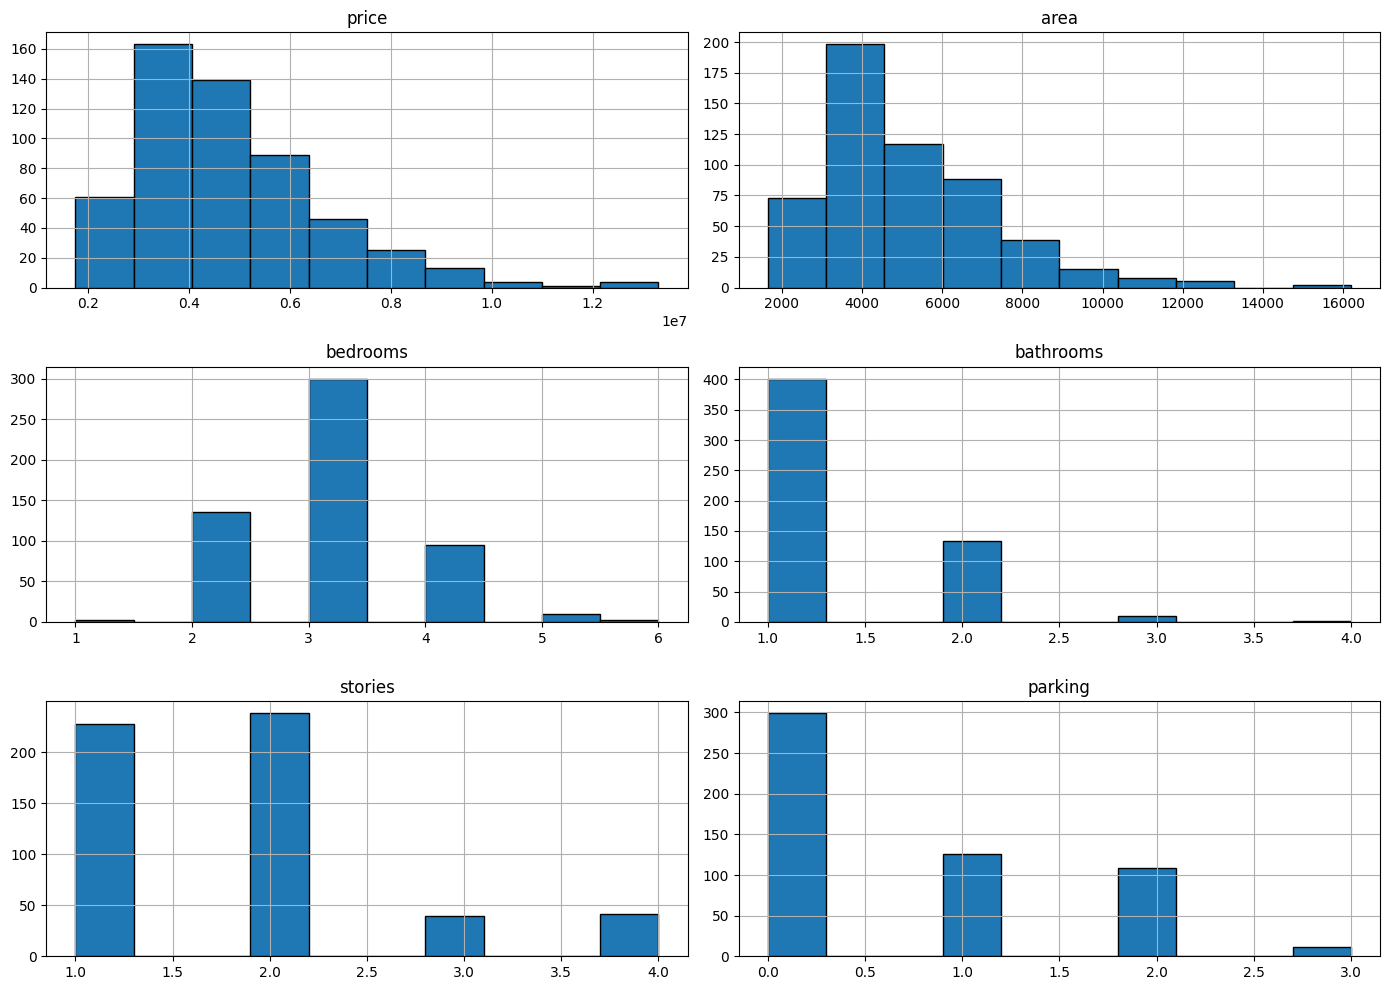

In [ ]:
df.hist(figsize=(14, 10), edgecolor='black')
plt.tight_layout()
plt.show()

#Analysis

Average price: 4766729.247706422


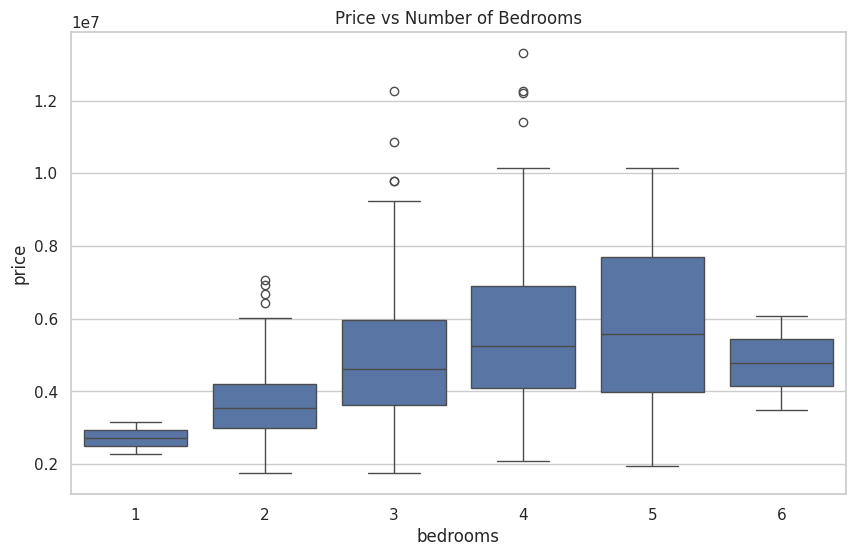

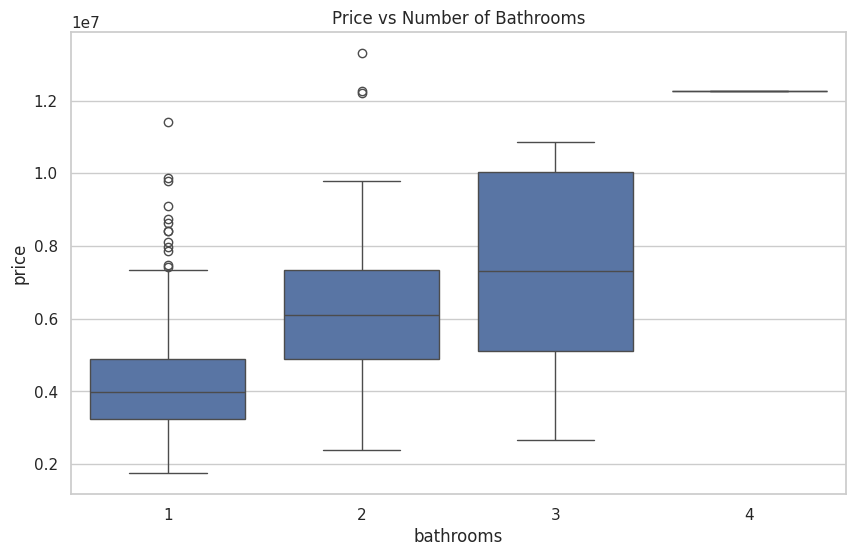

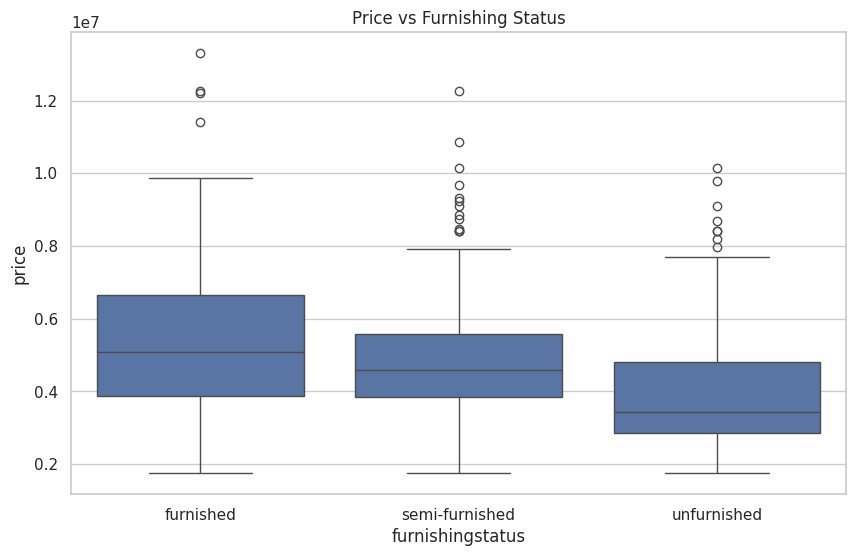

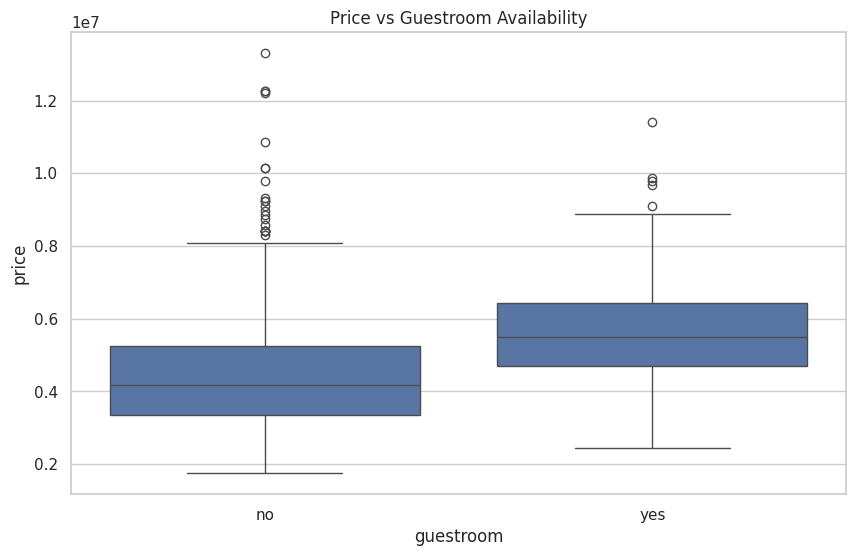

Top correlated features with price:
 price                  1.000000
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
bedrooms               0.366494
prefarea_yes           0.329777
mainroad_yes           0.296898
guestroom_yes          0.255517
Name: price, dtype: float64


In [ ]:
# the average price of a house
print("Average price:", df['price'].mean())

# bedrooms tend to be more expensive
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Price vs Number of Bedrooms")
plt.show()

# bathrooms influence the price
sns.boxplot(x="bathrooms", y="price", data=df)
plt.title("Price vs Number of Bathrooms")
plt.show()

# furnishing status affect the price
sns.boxplot(x="furnishingstatus", y="price", data=df)
plt.title("Price vs Furnishing Status")
plt.show()

#  guest room affect price
sns.boxplot(x="guestroom", y="price", data=df)
plt.title("Price vs Guestroom Availability")
plt.show()

# factors that correlate with price
df_encoded = pd.get_dummies(df, drop_first=True)
correlations = df_encoded.corr()['price'].sort_values(ascending=False)
print("Top correlated features with price:\n", correlations.head(10))


# 📊Visualization

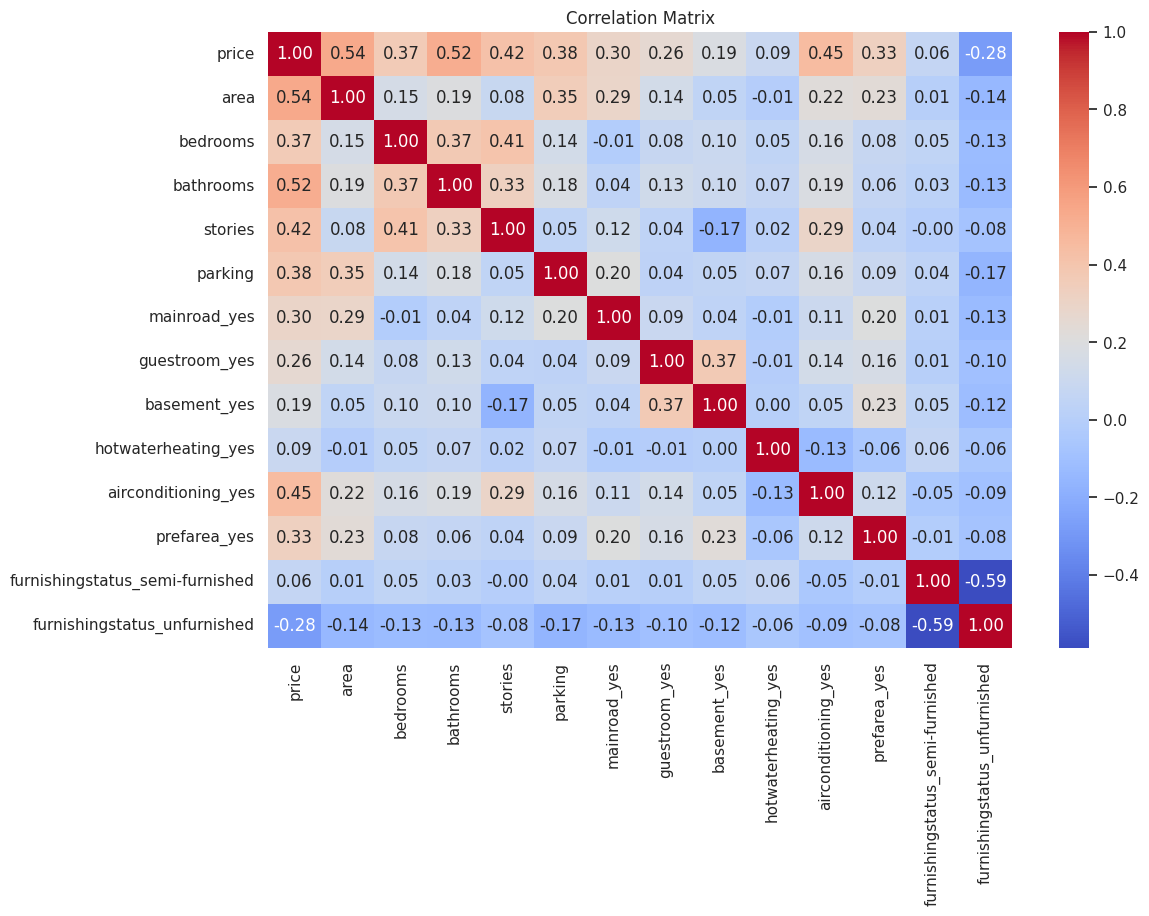

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

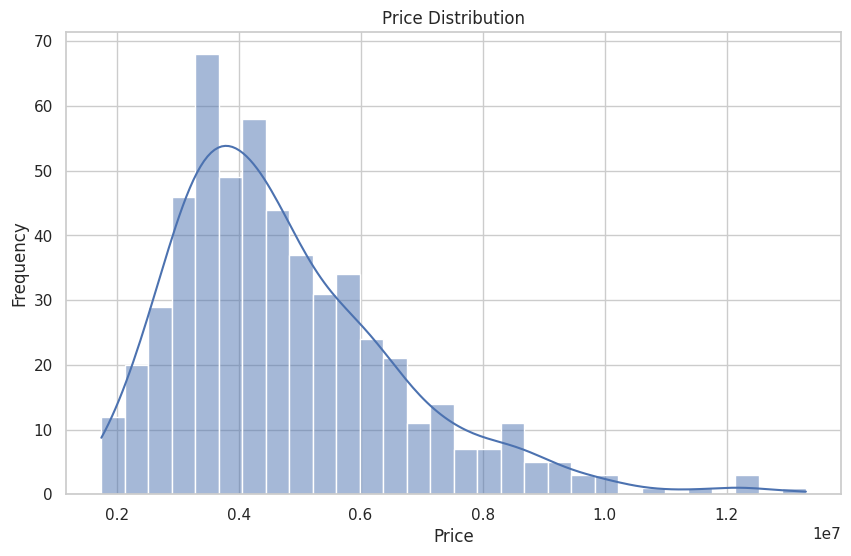

In [ ]:
# Price distribution
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

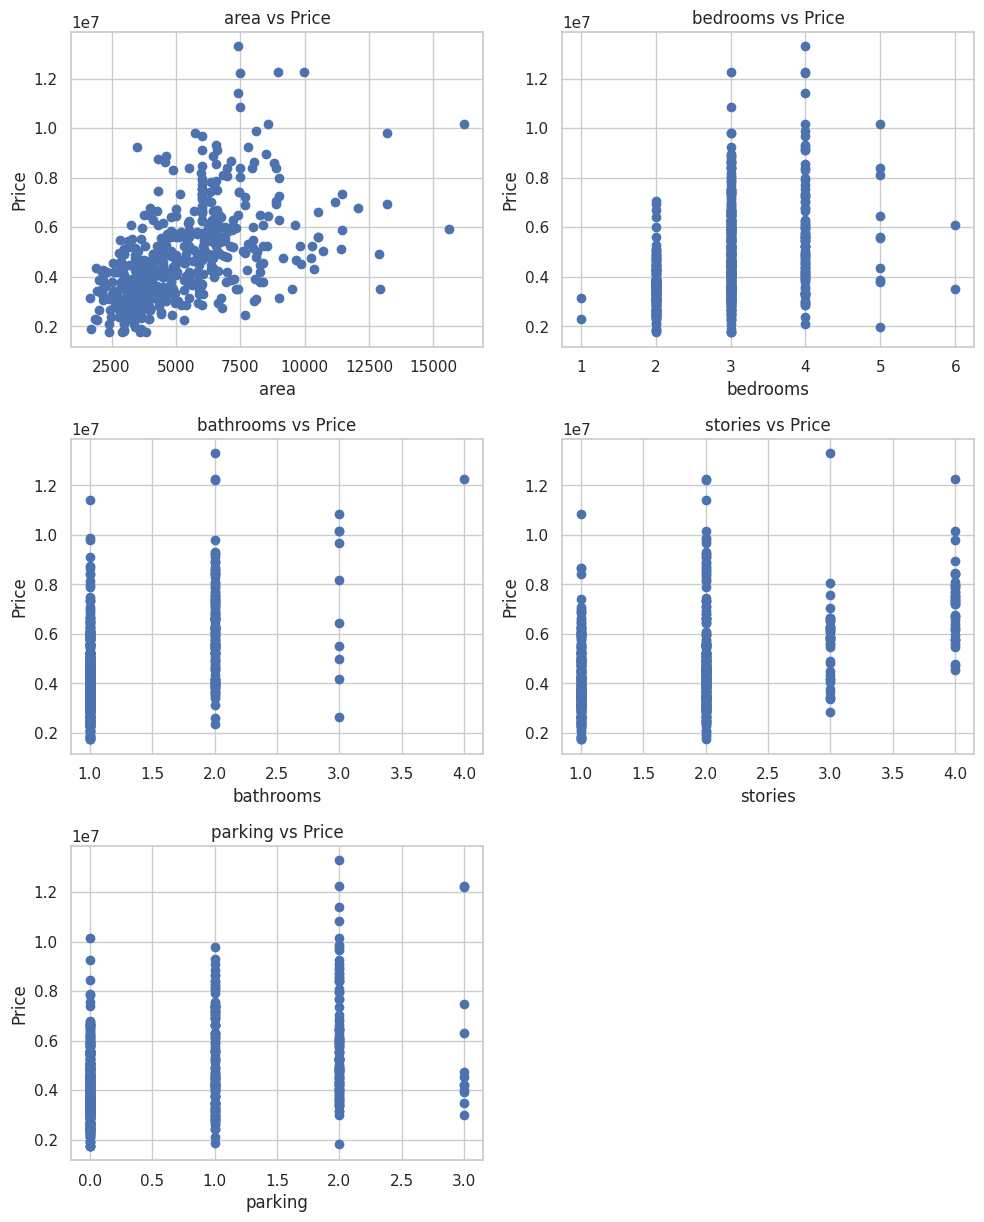

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()